In [111]:
#Ex. 2.1.1: The performance of a random forest classifier is highly sensitive to hyper parameters. 
#Therefore, you should be intimately familiar with what the most important ones do. For each point 
#below, explain what the hyper parameter pertaining to sklearn.ensemble.RandomForestClassifier controls, 
#and how setting it either too low or too high (or True/False) might hurt model performance:

# Answer:
# In the sklearn version of the random forest classifier the hyperparameter "bootstrap" just tells whether 
# bootstrap samples are used when building the decision trees. If bootstrap=True we draw a random bootstrap sample 
# with replacement of size n (where n is the size of our training set) for each decision tree. If bootstrap=False,
# the whole data set is used for each decision tree. We should never choose bootstrap=False, since using the the
# entire training sample for each decision tree will reduce the randomness of the forest and in turn imply the risk
# of overfitting.

# A more general framework would allow us to set the sample size of the bootstrap sample. However, the size of 
# the bootstrap in sklearn is set to be equal to the number of samples in the original training set, which usually 
# provide a good bias-variance tradeoff, Rashka (2017).

# The hyperparameter "max_features" sets the number of features to consider when looking for the best split. By 
# choosing the number of features we can control the bias-variance tradeoff of the random forest. Decreasing 
# the number of features increases the randomness of the random forest, and can help to reduce the effect 
# of overfitting. However, decreasing the number of features typically result in a lower performance of the 
# predictions on the training data. In practice the number of features is set to be equal to the quare root of 
# number of the features in the sample, which usually provide a good bias-variance tradeoff, Rashka (2017).

# The hyperparameter "max_depth" sets the maximum depth of the trees. If max_depth=None, then nodes are expanded 
# until all leaves are pure or until all leaves contain less than min_samples_split (another potential 
# hyperparamter) samples. The individual trees are very prone to overfitting when we set max_depth=None. However,
# the idea behind ensemble models (like random forest) is to use bagging to avoid the variance problem of the
# individual trees. Hence, we should set max_depth=None and set the hyperparameter "n_estimators" sufficiently large
# to reduce the variance problem. In practice the only parameter we need to care about is the the number of 
# trees in the forest. Typically, the larger the number of trees, the better performance of the predicter at the 
# expense of an increased computational cost. 


In [112]:
#Ex. 2.1.2: For n_estimators > 1 how should one set the hyper-parameters max_features and bootstrap so 
#that all the trees in the ensemble end up identical?

# Answer: Set the number of max_features equal to the number of features in the data set and set bootstrap=False 
# such that the algorithm always use the entire data set. This implies that the random forest 
# algorithm for each tree uses all features and all observations. Hence, all the trees become identical.
# Since each trees are identical and uses all features the model will become prone to overfitting and we 
# would expect it to predict poorly out of sample.

In [113]:
#Load data and standardize

import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

%matplotlib inline

# Standardize
sc = StandardScaler()
X_wine_std   = sc.fit_transform(X_wine)
X_digits_std = sc.fit_transform(X_digits)


In [46]:
# Dimension reduction (digits data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
Z_digits_pca = pca.fit_transform(X_digits_std)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=2, store_covariance=False, tol=0.0001)
Z_digits_lda = lda.fit_transform(X_digits_std,y_digits)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
Z_digits_tsne = tsne.fit_transform(X_digits_std,y_digits)

import umap
umapr = umap.UMAP(n_components=2)
Z_digits_umap = umapr.fit_transform(X_digits_std)



C:\Users\tcg865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0

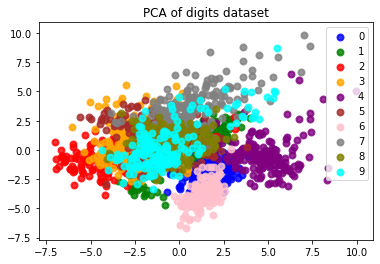

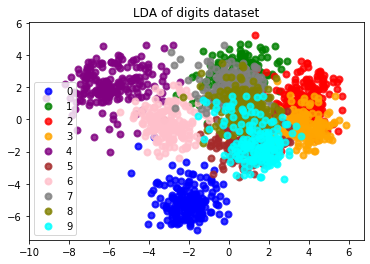

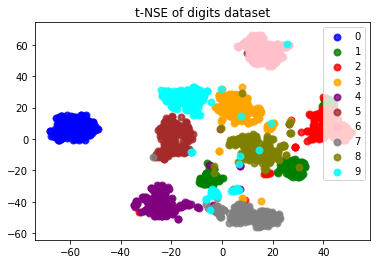

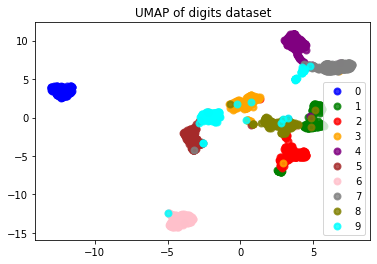

In [105]:
# plot figures (digits data)

target_names_digits = data_digits.target_names
#target_names_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#target_names_digits

plt.figure()
colors = ['blue','green','red','orange','purple','brown','pink','gray','olive','cyan']
lw = 2

for color, i, target_names_digits in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names_digits):
    plt.scatter(Z_digits_pca[y_digits == i, 0], Z_digits_pca[y_digits == i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_names_digits)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of digits dataset')

target_names_digits = data_digits.target_names

plt.figure()
for color, i, target_names_digits in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names_digits):
    plt.scatter(Z_digits_lda[y_digits == i, 0], Z_digits_lda[y_digits == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_digits)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of digits dataset')

target_names_digits = data_digits.target_names

plt.figure()
for color, i, target_names_digits in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names_digits):
    plt.scatter(Z_digits_tsne[y_digits == i, 0], Z_digits_tsne[y_digits == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_digits)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-NSE of digits dataset')

target_names_digits = data_digits.target_names

plt.figure()
for color, i, target_names_digits in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names_digits):
    plt.scatter(Z_digits_umap[y_digits == i, 0], Z_digits_umap[y_digits == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_digits)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('UMAP of digits dataset')

plt.show()

In [120]:
# Dimension reduction (wine data)
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
Z_wine_pca = pca.fit_transform(X_wine_std)

lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=2, store_covariance=False, tol=0.0001)
Z_wine_lda = lda.fit_transform(X_wine_std,y_wine)

tsne = TSNE(n_components=2)
Z_wine_tsne = tsne.fit_transform(X_wine_std,y_wine)

umapr = umap.UMAP(n_components=2)
Z_wine_umap = umapr.fit_transform(X_wine_std)

# Dimension reduction (wine data, non-standardized)
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
W_wine_pca = pca.fit_transform(X_wine)

lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=2, store_covariance=False, tol=0.0001)
W_wine_lda = lda.fit_transform(X_wine,y_wine)

tsne = TSNE(n_components=2)
W_wine_tsne = tsne.fit_transform(X_wine,y_wine)

umapr = umap.UMAP(n_components=2)
W_wine_umap = umapr.fit_transform(X_wine)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

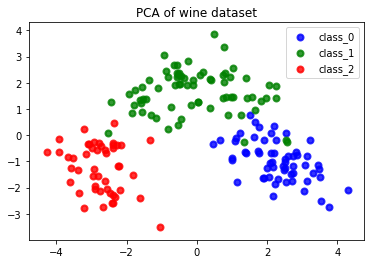

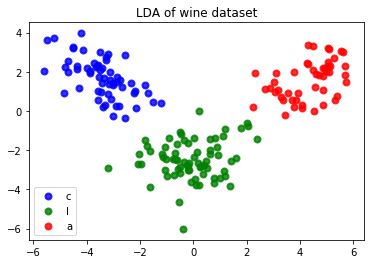

In [121]:
# plot figures (wine data)

target_names_wine = data_wine.target_names

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
colors = ['blue','green','red','orange','purple','brown','pink','gray','olive','cyan']
lw = 2

for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(Z_wine_pca[y_wine == i, 0], Z_wine_pca[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of wine dataset')

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(Z_wine_lda[y_wine == i, 0], Z_wine_lda[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine dataset')

plt.show()

<Figure size 432x288 with 0 Axes>

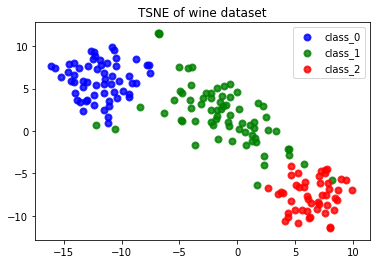

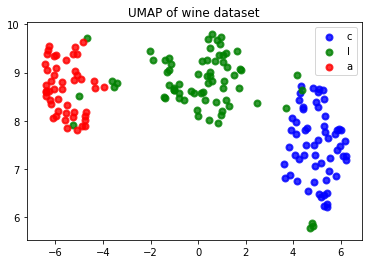

In [122]:
target_names_wine = data_wine.target_names

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
colors = ['blue','green','red','orange','purple','brown','pink','gray','olive','cyan']
lw = 2

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(Z_wine_tsne[y_wine == i, 0], Z_wine_tsne[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of wine dataset')

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(Z_wine_umap[y_wine == i, 0], Z_wine_umap[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('UMAP of wine dataset')

plt.show()

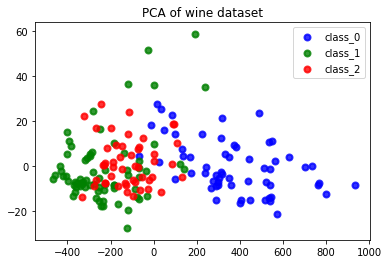

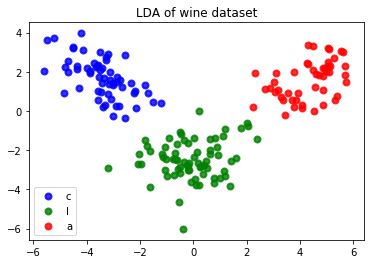

In [125]:
# plot figures (digits data)

target_names_wine = data_wine.target_names
#target_names_wine = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
colors = ['blue','green','red','orange','purple','brown','pink','gray','olive','cyan']
lw = 2

for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(W_wine_pca[y_wine == i, 0], W_wine_pca[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of wine dataset')

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(W_wine_lda[y_wine == i, 0], W_wine_lda[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine dataset')

plt.show()

<Figure size 432x288 with 0 Axes>

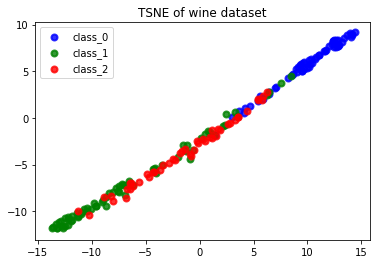

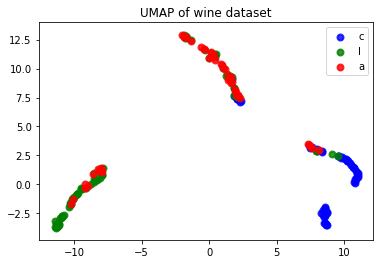

In [127]:
# plot figures (digits data)

target_names_wine = data_wine.target_names
#target_names_wine = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
colors = ['blue','green','red','orange','purple','brown','pink','gray','olive','cyan']
lw = 2

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(W_wine_tsne[y_wine == i, 0], W_wine_tsne[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of wine dataset')

plt.figure()
for color, i, target_names_wine in zip(colors, [0, 1, 2], target_names_wine):
    plt.scatter(W_wine_umap[y_wine == i, 0], W_wine_umap[y_wine == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_names_wine)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('UMAP of wine dataset')

plt.show()

In [103]:
# Principal Component Analysis (CPA) ranks the principal component (CP) after which CP that explains most of the variation in 
# the data. If a data set has d features we can use CPA to choose the k CP's that explains most of the variation, where k<d. 
# These CP's are projections of the original data and will contain most of the informaiton. Hence, PCA reduce the dimensions 
# by focusing on the features with most variation.

# Linear Discrimination analysis (LDA) is like PCA, but focus on maximizing the separatibility among known classes.
# LD1 accounts for the most variation between the classes.

# Since LDA uses more information (uses the observed classifier, y) and maximizes separatibility among classes usually does
# a better job in separating the classes than the CPA. This is also what we observe for both the digits and wine data sets.

# CPA and LDA are highly sensitive to data scaling since variation measured by the covariance matrix, which highly affected by
# different scaling.

# The digits data set contains 32x32 bitmaps images of 10 hand-written digits. Each image are divided into 8x8 nonover-
# lapping blocks and the number of on pixels are counted in each block. This implies that the data sets consists of 64 
# features where each feature takes an integer value in the range 0-16. Hence, the features share the same scale, and we 
# do not win much from standardizing the features.

# In contrast the wine data set contains a chemical analysis of wines grown in the same region in Italy by three different 
# cultivators. The features of the data set contains thirteen different measurements taken for different constituents 
# found in the three types of wine. Hence, the features do not share the same scale, and we will have to standardize them.



In [128]:
# The intuition for why honesty is required in order to get good local treatment effect estimates?

# In contrast to adaptive estimation honest estimation uses different samples to build the partition 
# and estimate leaf effects. The advantage of honest estimation is that it avoids a problem of adaptive 
# estimation, which is that spurious extreme outcomes are likely to be placed into the same partition as 
# other extreme outcomes by the CART algorithm, and thus the sample means of the outcomes are more extreme 
# than they would be in an independent sample which biases the estimated local treatment effect. Hence,
# Fitting both on the training sample risks overfitting since estimating many “heterogeneous effects” that are 
# really just noise idiosyncratic to the sample. 


# The practical implementation of the causal tree (CT) algorithm?

# The workhorse model in machine learning to estimate heterogenous treatment effect is the CART algorithm. 
# In the following I first give a quick introduction to CART algorithm and based on this I explain the two major modifications
# of the CART algorithm that results in the CT algorithm. In summary the two approaches differ with respect to sample 
# splitting and the splitting criterion.

# The CART algorithm is an adaptive estimator that in the tree-building phase, recursively partitions the observations 
# of the entire training sample. For each leaf, the algorithm evaluates all candidate splits of that leaf using the 
# MSE criterion. The issue of overfitting is then controlled for by applying cross-validation to select a penalty on 
# tree depth. 

# The CT algorithm is an honest estimator that splits the training sample into two parts, one for constructing the
# tree  and a second for estimating treatment effects within leaves of the constructed tree. Note that sincethe CT 
# algorithm also can overfit due to noisy leaves we still need apply cross-validation when building the tree. As 
# splitting criterion we use the adjusted MSE where the MSE is adjusted by E[yi^2]. Because this does not depend on
# an estimator it does not affect the criterion ranks estimators.






